<a href="https://colab.research.google.com/github/HarshKumarChoudary/AC-Data-Analysis/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

We are aimed to derive insights from the given data set AC_Data.csv

**Description of Dataset**

The data set is being described as :


*   It consists of values of power consumed by AC at a hotel in Gurgaon in two months on per minute basis.
*   Months are of august and september.



First of all importing the data set and **pre-processing** it to make it clear to work with.

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("/content/AC_Data.csv",parse_dates=['0'])

# Preprocessing data by interpolation
for col in df.columns:
  df[col] = df[col].interpolate(method='linear',limit_direction='forward')

print(df)

                        0      AC 1      AC 2  ...     AC 16     AC 17     AC 18
0     2019-08-01 00:00:00  7.518632  8.788315  ...  4.113460  3.305072  6.735981
1     2019-08-01 00:01:00  7.472373  8.864465  ...  4.049972  3.262830  6.557740
2     2019-08-01 00:02:00  7.426114  8.940615  ...  3.986483  3.220588  6.379500
3     2019-08-01 00:03:00  7.239550  9.050859  ...  3.892182  3.176074  6.371487
4     2019-08-01 00:04:00  7.052986  9.161103  ...  3.797881  3.131560  6.363475
...                   ...       ...       ...  ...       ...       ...       ...
87835 2019-09-30 23:55:00  0.000000  6.122385  ...  1.854352  3.027539  7.259989
87836 2019-09-30 23:56:00  0.604588  6.137458  ...  1.862619  3.009743  7.197318
87837 2019-09-30 23:57:00  1.209176  6.152532  ...  1.870886  2.991946  7.134647
87838 2019-09-30 23:58:00  1.319809  6.115407  ...  1.866526  3.000690  7.157183
87839 2019-09-30 23:59:00  1.430442  6.078281  ...  1.862166  3.009434  7.179719

[87840 rows x 19 columns]


In [3]:
df.index.name = 'id'
df.rename({'0':'Date and Timings'},axis=1,inplace=True)
print(df.columns.tolist())

['Date and Timings', 'AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17', 'AC 18']


In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date and Timings  87840 non-null  datetime64[ns]
 1   AC 1              87840 non-null  float64       
 2   AC 2              87840 non-null  float64       
 3   AC 3              87840 non-null  float64       
 4   AC 4              87840 non-null  float64       
 5   AC 5              87840 non-null  float64       
 6   AC 6              87840 non-null  float64       
 7   AC 7              87840 non-null  float64       
 8   AC 8              87840 non-null  float64       
 9   AC 9              87840 non-null  float64       
 10  AC 10             87840 non-null  float64       
 11  AC 11             87840 non-null  float64       
 12  AC 12             87840 non-null  float64       
 13  AC 13             87840 non-null  float64       
 14  AC 14             8784

Since now we had completed our preprocessing on the dataset, now we are aimed to derive beautiful insights from it.


In [8]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
plt.style.use('ggplot') # Make it pretty

import plotly.graph_objects as go
import plotly.offline as py
from plotly.subplots import make_subplots

Converting Data on **hourly** basis from **minute** basis. This will help us to derive insight on per hour basis.

In [9]:
Hourlydata = df.resample('1H',on = 'Date and Timings').mean().reset_index()
print(Hourlydata)

        Date and Timings      AC 1      AC 2  ...     AC 16     AC 17     AC 18
0    2019-08-01 00:00:00  6.831317  8.499431  ...  4.252056  2.629953  5.148527
1    2019-08-01 01:00:00  7.409921  8.464055  ...  4.606612  2.574381  3.971865
2    2019-08-01 02:00:00  7.356081  8.112770  ...  5.284894  2.741124  3.949288
3    2019-08-01 03:00:00  6.633610  7.908404  ...  4.990273  4.248621  3.898252
4    2019-08-01 04:00:00  6.595406  7.297426  ...  4.815338  4.176402  3.938632
...                  ...       ...       ...  ...       ...       ...       ...
1459 2019-09-30 19:00:00  2.339905  5.743664  ...  1.632330  4.656021  7.327908
1460 2019-09-30 20:00:00  2.255508  7.241209  ...  1.358291  4.658408  7.342951
1461 2019-09-30 21:00:00  2.241854  5.412647  ...  1.389099  4.564796  7.188351
1462 2019-09-30 22:00:00  2.217776  6.637301  ...  1.497097  3.905589  6.500787
1463 2019-09-30 23:00:00  2.216451  6.040992  ...  1.789888  3.105588  4.813741

[1464 rows x 19 columns]


In [11]:
Hourlydata.describe().T

,count,mean,std,min,25%,50%,75%,max
AC 1,1464.0,2.376302,2.078752,0.000000,0.883037,1.927251,3.464433,9.804574
AC 2,1464.0,3.861889,2.321746,0.000000,2.158831,3.801688,5.205039,10.884832
AC 3,1464.0,2.565133,1.233748,0.000000,1.768423,2.448705,3.272899,8.011404
AC 4,1464.0,2.392535,1.560069,0.000000,1.308769,2.220298,3.330027,8.435042
AC 5,1464.0,1.420251,0.509418,0.077786,1.029419,1.348255,1.720857,3.832815
AC 6,1464.0,2.516540,1.268425,0.000000,1.669705,2.573430,3.408469,6.330415
AC 7,1464.0,2.977509,1.080168,0.000000,2.256835,2.945822,3.665584,7.568163
AC 8,1464.0,2.545456,1.114083,0.000000,1.791816,2.512708,3.263557,7.147895
AC 9,1464.0,3.178516,1.126553,0.000000,2.412351,3.005536,3.809490,8.314747
AC 10,1464.0,1.536174,0.480796,0.000000,1.192554,1.492962,1.833687,3.412595


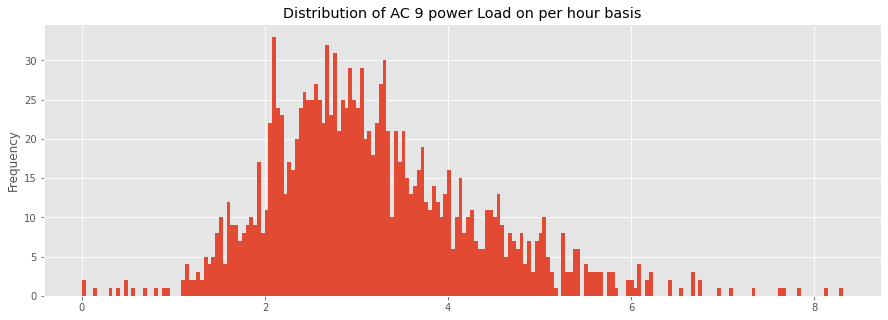

In [16]:
_ = Hourlydata['AC 9'].plot.hist(figsize=(15, 5), bins=200, title='Distribution of AC 9 power Load on per hour basis')

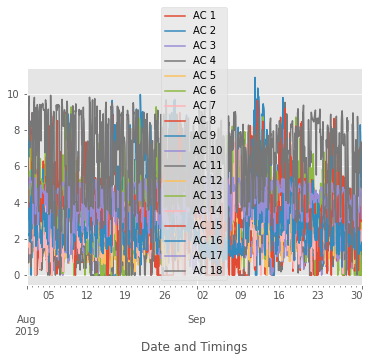

In [17]:
Hourlydata.plot(x='Date and Timings')
plt.show()

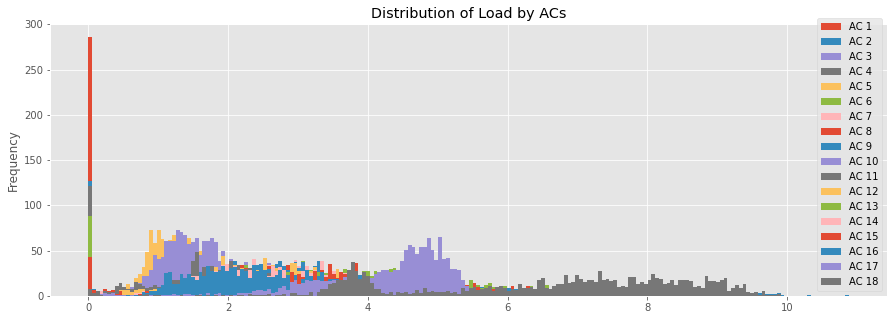

In [19]:

_ = Hourlydata.plot.hist(x='Date and Timings',figsize=(15, 5), bins=200,title='Distribution of Load by ACs')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Power Consumption Distribution for AC 15')

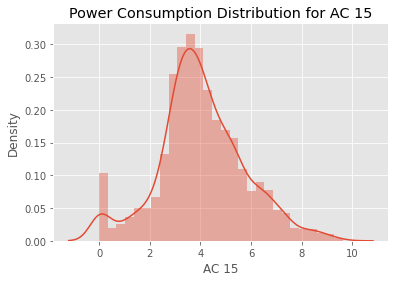

In [25]:
sns.distplot(Hourlydata["AC 15"])
plt.title("Power Consumption Distribution for AC 15")

In [47]:
Hourlydata['dow'] = Hourlydata['Date and Timings'].dt.dayofweek
Hourlydata['doy'] = Hourlydata['Date and Timings'].dt.dayofyear
Hourlydata['month'] = Hourlydata['Date and Timings'].dt.month
Hourlydata['woy'] = Hourlydata['Date and Timings'].dt.weekofyear
Hourlydata['dom'] = Hourlydata['Date and Timings'].dt.day # Day of Month
Hourlydata['weekday'] = Hourlydata['Date and Timings'].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



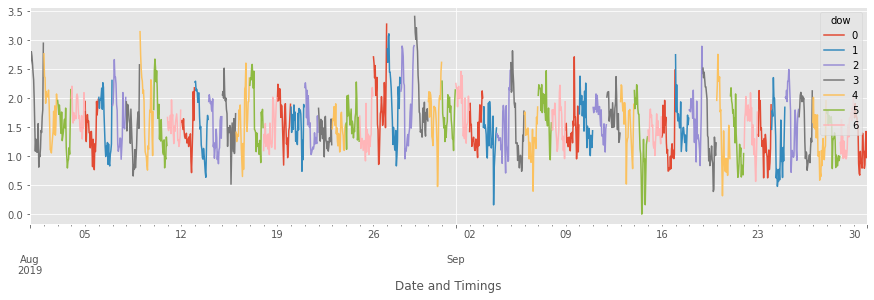

In [48]:
_ = Hourlydata.pivot_table(index=Hourlydata['Date and Timings'],columns='dow',values='AC 10',aggfunc='sum').plot(figsize=(15,4))

In [55]:
Hourlydata['hour'] = Hourlydata['Date and Timings'].dt.hour
Hourlydata

,Date and Timings,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,dow,doy,month,woy,dom,weekday,hour
0,2019-08-01 00:00:00,6.831317,8.499431,1.818682,0.975186,2.226705,4.305690,2.678105,4.827529,3.631382,2.561074,1.648186,2.027200,4.716227,5.231973,5.657984,4.252056,2.629953,5.148527,3,213,8,31,1,3,0
1,2019-08-01 01:00:00,7.409921,8.464055,1.473305,1.842207,2.231021,4.304568,2.603761,4.467366,3.053147,2.660621,1.357206,1.893804,5.089799,5.689334,5.939549,4.606612,2.574381,3.971865,3,213,8,31,1,3,1
2,2019-08-01 02:00:00,7.356081,8.112770,1.492203,1.478549,1.997557,4.232891,2.773172,3.792759,3.116219,2.803366,1.544293,1.912718,4.031990,5.029272,6.225177,5.284894,2.741124,3.949288,3,213,8,31,1,3,2
3,2019-08-01 03:00:00,6.633610,7.908404,2.250147,1.452142,2.087573,4.725451,3.021327,3.897844,2.845015,2.729238,1.117579,1.677892,4.406184,5.016430,4.910233,4.990273,4.248621,3.898252,3,213,8,31,1,3,3
4,2019-08-01 04:00:00,6.595406,7.297426,1.733085,2.556184,1.869750,3.606569,2.927028,3.757071,3.385324,2.599631,1.211025,1.831026,3.983865,4.278251,5.326393,4.815338,4.176402,3.938632,3,213,8,31,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,2019-09-30 19:00:00,2.339905,5.743664,2.340288,1.745933,0.792333,0.000000,1.552227,2.284567,1.360746,0.848737,1.443272,1.956877,3.331293,2.079025,2.977811,1.632330,4.656021,7.327908,0,273,9,40,30,0,19
1460,2019-09-30 20:00:00,2.255508,7.241209,2.721143,1.327477,0.730407,0.222064,2.463974,2.386358,2.704640,1.226419,1.131552,1.991316,4.264752,2.497070,2.967796,1.358291,4.658408,7.342951,0,273,9,40,30,0,20
1461,2019-09-30 21:00:00,2.241854,5.412647,2.964478,1.430479,0.750245,0.000000,2.814522,2.150046,3.168274,1.427695,1.586310,2.498655,3.247864,1.934587,3.187520,1.389099,4.564796,7.188351,0,273,9,40,30,0,21
1462,2019-09-30 22:00:00,2.217776,6.637301,3.065712,1.678650,0.614267,0.772325,3.338351,3.803294,5.267113,0.973526,3.953576,2.725670,4.719095,2.179085,3.868026,1.497097,3.905589,6.500787,0,273,9,40,30,0,22


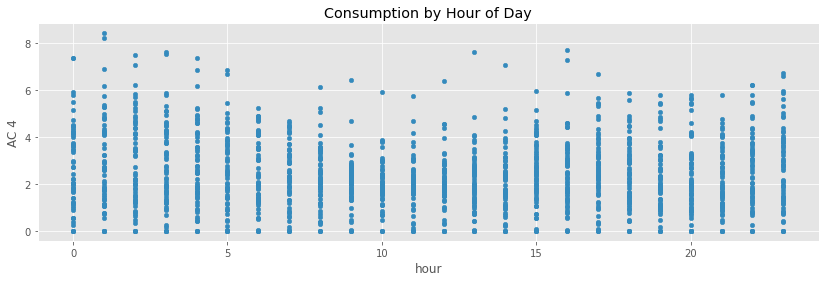

In [56]:
_ = Hourlydata[['AC 4','hour']].plot(x='hour',
                                     y='AC 4',
                                     kind='scatter',
                                     figsize=(14,4),
                                     title='Consumption by Hour of Day')

Now its time to derive insight on data on per ***Day*** basis.

In [49]:
days = df.resample('1D',on = 'Date and Timings').mean().reset_index()
print(days.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date and Timings  61 non-null     datetime64[ns]
 1   AC 1              61 non-null     float64       
 2   AC 2              61 non-null     float64       
 3   AC 3              61 non-null     float64       
 4   AC 4              61 non-null     float64       
 5   AC 5              61 non-null     float64       
 6   AC 6              61 non-null     float64       
 7   AC 7              61 non-null     float64       
 8   AC 8              61 non-null     float64       
 9   AC 9              61 non-null     float64       
 10  AC 10             61 non-null     float64       
 11  AC 11             61 non-null     float64       
 12  AC 12             61 non-null     float64       
 13  AC 13             61 non-null     float64       
 14  AC 14             61 non-nul

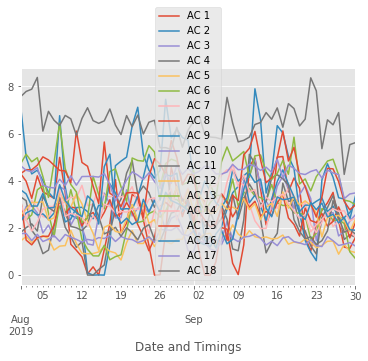

In [50]:
days.plot(x='Date and Timings')
plt.show()

We could see the usage of different ACs on per Day basis as shown in above figure.


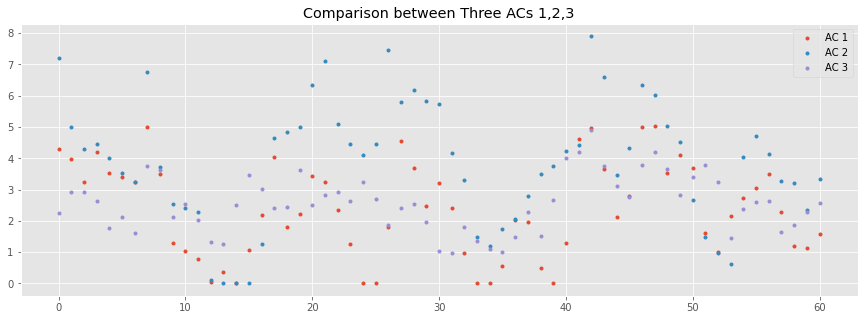

In [23]:
_ = days[['AC 1','AC 2','AC 3']] \
    .plot(style='.', figsize=(15, 5), title='Comparison between Three ACs 1,2,3')

Here X represents "Days" and Y represents "their power usage"

Adding new and Meaning full columns to our dataset

In [51]:
days['dow'] = days['Date and Timings'].dt.dayofweek
days['doy'] = days['Date and Timings'].dt.dayofyear
days['month'] = days['Date and Timings'].dt.month
days['woy'] = days['Date and Timings'].dt.weekofyear
days['dom'] = days['Date and Timings'].dt.day # Day of Month
days['weekday'] = days['Date and Timings'].dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [52]:
days

,Date and Timings,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,dow,doy,month,woy,dom,weekday
0,2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096,3,213,8,31,1,3
1,2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343,4,214,8,31,2,4
2,2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526,5,215,8,31,3,5
3,2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225,6,216,8,31,4,6
4,2019-08-05,3.536980,4.008955,1.785850,0.910069,1.673115,3.793809,2.484910,1.642972,2.596842,1.423775,3.347532,3.107324,4.177918,2.795171,5.013642,3.466886,3.813778,6.106891,0,217,8,32,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019-09-26,3.507869,4.147379,2.649227,3.374334,1.444154,2.301838,2.060002,2.278169,2.929070,1.457746,3.163686,2.494480,4.914755,2.816173,4.505642,2.578243,4.331568,6.372984,3,269,9,39,26,3
57,2019-09-27,2.299397,3.281170,1.660224,2.620449,0.888126,2.355991,2.290790,2.892445,2.423409,1.258341,2.436058,2.531860,4.244210,2.705481,3.960751,2.213882,4.265494,6.890618,4,270,9,39,27,4
58,2019-09-28,1.187906,3.226275,1.856999,1.511555,1.301799,2.184178,1.872020,2.325760,2.441901,1.307919,1.822027,2.301743,3.182070,2.729225,3.126808,2.433880,3.242749,4.270624,5,271,9,39,28,5
59,2019-09-29,1.133421,2.359928,2.291227,1.710210,1.020792,0.988985,1.869697,1.580643,2.647833,1.378947,1.936287,1.840926,3.127231,2.299264,2.768808,1.925555,3.440847,5.532254,6,272,9,39,29,6


Comparison between the power consumption by AC 4 on each month.

In [59]:
days = days.set_index('Date and Timings')
print(days)

                      AC 1      AC 2      AC 3  ...  woy  dom  weekday
Date and Timings                                ...                   
2019-08-01        4.311251  7.192770  2.265914  ...   31    1        3
2019-08-02        3.977381  4.997287  2.910071  ...   31    2        4
2019-08-03        3.254814  4.291223  2.929456  ...   31    3        5
2019-08-04        4.210091  4.451087  2.636284  ...   31    4        6
2019-08-05        3.536980  4.008955  1.785850  ...   32    5        0
...                    ...       ...       ...  ...  ...  ...      ...
2019-09-26        3.507869  4.147379  2.649227  ...   39   26        3
2019-09-27        2.299397  3.281170  1.660224  ...   39   27        4
2019-09-28        1.187906  3.226275  1.856999  ...   39   28        5
2019-09-29        1.133421  2.359928  2.291227  ...   39   29        6
2019-09-30        1.588607  3.344281  2.558525  ...   40   30        0

[61 rows x 24 columns]


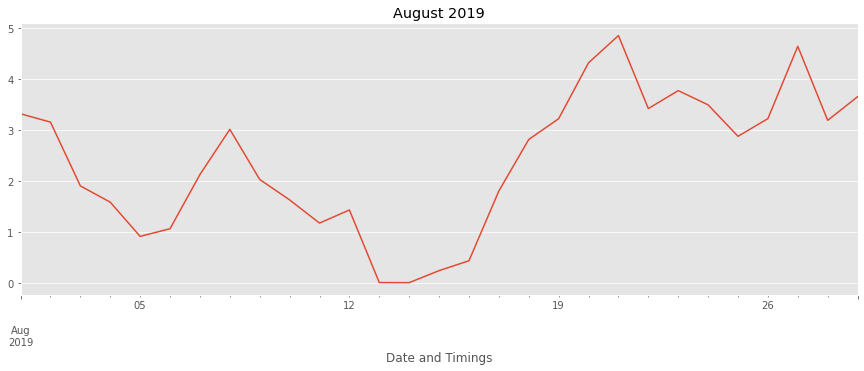

In [60]:
from datetime import datetime

_ = days['AC 4'].loc[(days['AC 4'].index >=datetime(2019, 8, 1)) &
               (days['AC 4'].index < datetime(2019, 8, 30))] \
    .plot(figsize=(15, 5), title = 'August 2019')

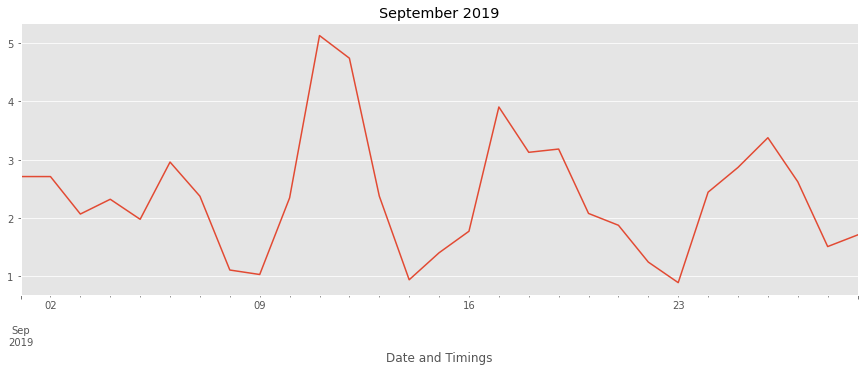

In [62]:
_ = days['AC 4'].loc[(days['AC 4'].index >=datetime(2019, 9, 1)) &
               (days['AC 4'].index < datetime(2019, 9, 30))] \
    .plot(figsize=(15, 5), title = 'September 2019')

Finally One **3D scatter plot**

In [67]:
days

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,dow,doy,month,woy,dom,weekday
Date and Timings,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-01,4.311251,7.192770,2.265914,3.320282,1.442006,2.799339,2.606838,3.261085,2.257789,1.761544,1.797694,2.539742,4.718219,3.061935,4.298479,3.620367,4.643621,7.561096,3,213,8,31,1,3
2019-08-02,3.977381,4.997287,2.910071,3.156393,1.638953,2.340743,2.334359,1.483584,2.635184,1.767480,2.011486,2.795197,5.123942,2.353536,4.470403,3.442106,4.444483,7.787343,4,214,8,31,2,4
2019-08-03,3.254814,4.291223,2.929456,1.902713,1.374562,2.555402,3.181457,1.283756,2.753423,1.462211,2.173384,3.077708,4.807019,1.865291,4.464468,2.929687,4.384711,7.883526,5,215,8,31,3,5
2019-08-04,4.210091,4.451087,2.636284,1.582040,1.555314,3.614907,2.850690,1.591165,2.546160,1.730887,1.868694,3.080474,4.976188,2.242919,4.661893,2.927226,4.555513,8.381225,6,216,8,31,4,6
2019-08-05,3.536980,4.008955,1.785850,0.910069,1.673115,3.793809,2.484910,1.642972,2.596842,1.423775,3.347532,3.107324,4.177918,2.795171,5.013642,3.466886,3.813778,6.106891,0,217,8,32,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,3.507869,4.147379,2.649227,3.374334,1.444154,2.301838,2.060002,2.278169,2.929070,1.457746,3.163686,2.494480,4.914755,2.816173,4.505642,2.578243,4.331568,6.372984,3,269,9,39,26,3
2019-09-27,2.299397,3.281170,1.660224,2.620449,0.888126,2.355991,2.290790,2.892445,2.423409,1.258341,2.436058,2.531860,4.244210,2.705481,3.960751,2.213882,4.265494,6.890618,4,270,9,39,27,4
2019-09-28,1.187906,3.226275,1.856999,1.511555,1.301799,2.184178,1.872020,2.325760,2.441901,1.307919,1.822027,2.301743,3.182070,2.729225,3.126808,2.433880,3.242749,4.270624,5,271,9,39,28,5


In [68]:
trace1 = go.Scatter3d(
    x=days.index.values,
    z=days['AC 1'].values,
    y=days['month'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = days['AC 1'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Plot For AC 1'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot for AC 1')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')